In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# getting the csv file

df=pd.read_csv('./datasets/onlinefraud.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#shape of the data
df.shape

(6362620, 11)

In [7]:
#columns in dataset

df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')




Columns in dataset¶


step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df[df['isFraud']!=df['isFlaggedFraud']]
# total frauds in the data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [15]:
#checking for missing values

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# its a good thing that there is no missing values

checking for the few columns

In [16]:
df.nameOrig.value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [19]:
df.nameDest.value_counts()>100

nameDest
C1286084959     True
C985934102      True
C665576141      True
C2083562754     True
C248609774      True
               ...  
M1470027725    False
M1330329251    False
M1784358659    False
M2081431099    False
C2080388513    False
Name: count, Length: 2722362, dtype: bool

In [20]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [21]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [32]:
df.oldbalanceOrg

0           170136.00
1            21249.00
2              181.00
3              181.00
4            41554.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: oldbalanceOrg, Length: 6362620, dtype: float64

# Exploratory data analysis

### Univariate analysis
it is used to analyze the data of a single variable

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: xlabel='step', ylabel='Count'>

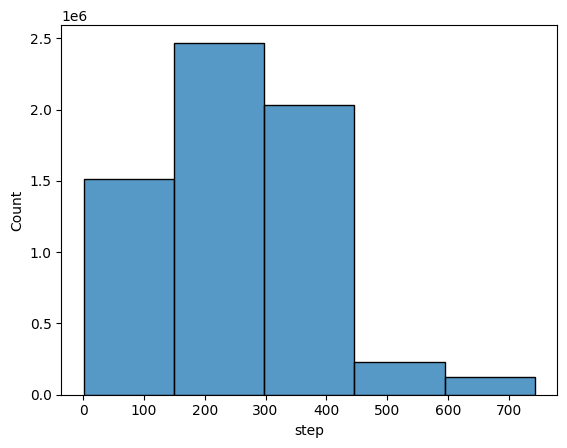

In [30]:
df.step
sns.histplot(df.step,bins=5)

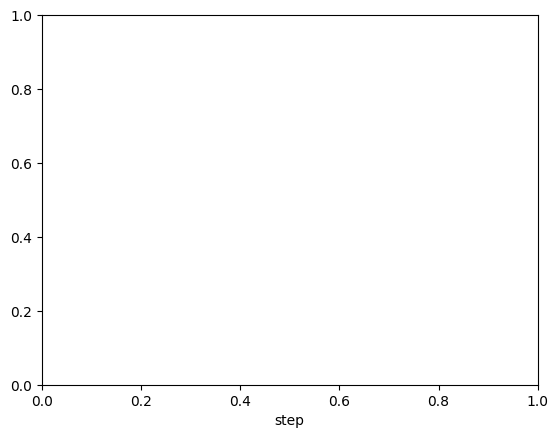

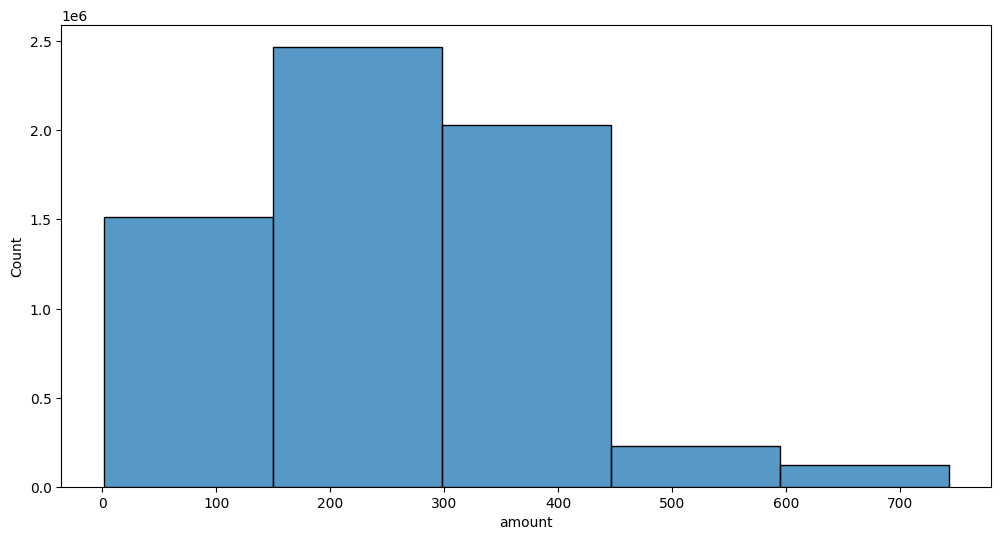

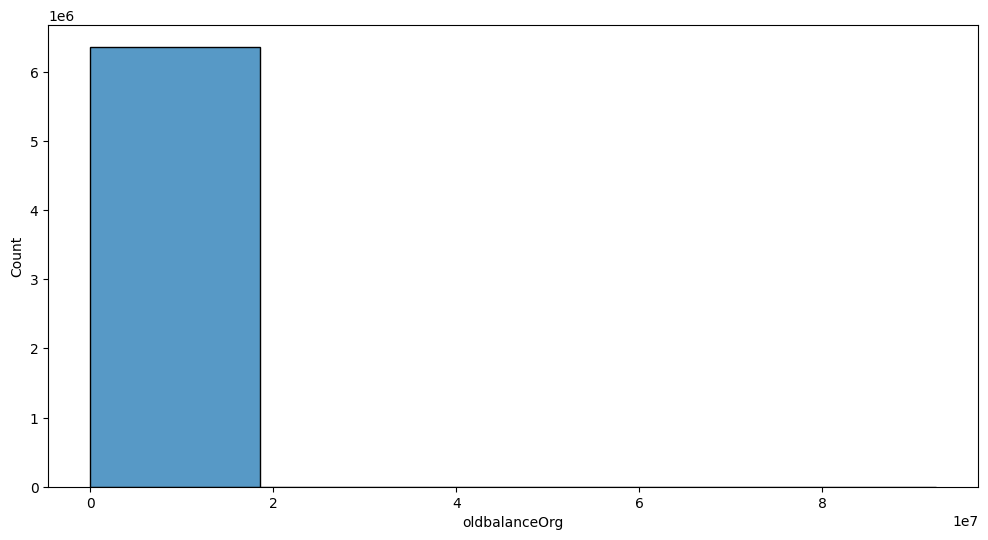

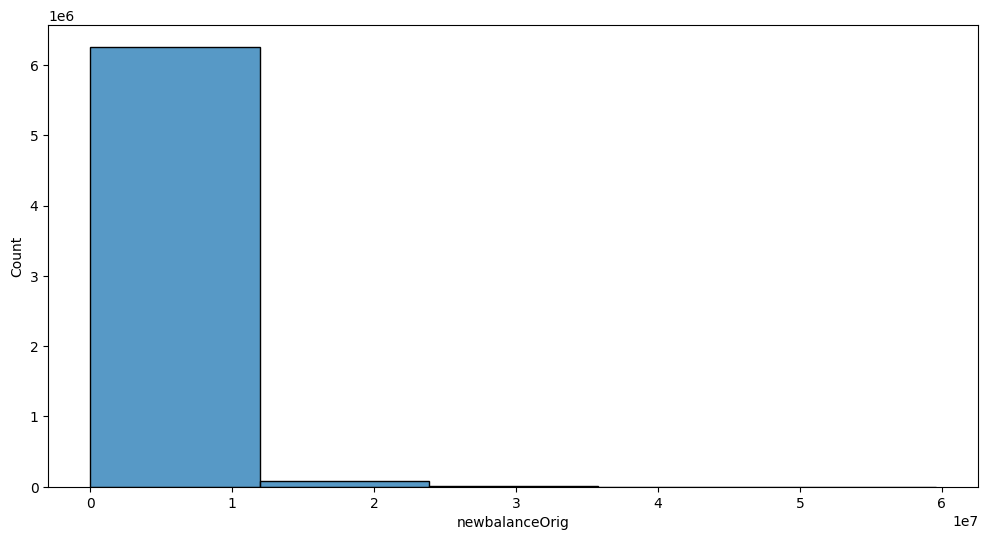

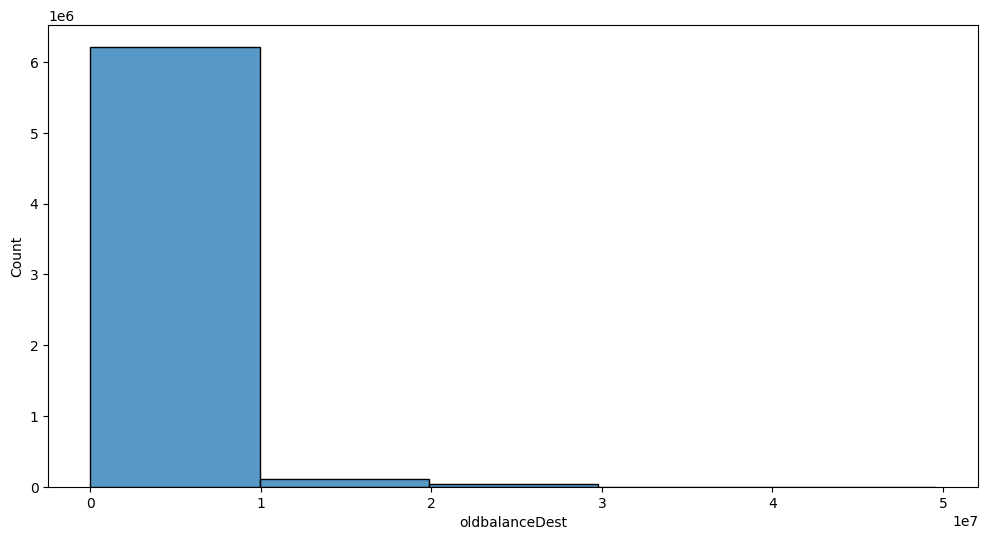

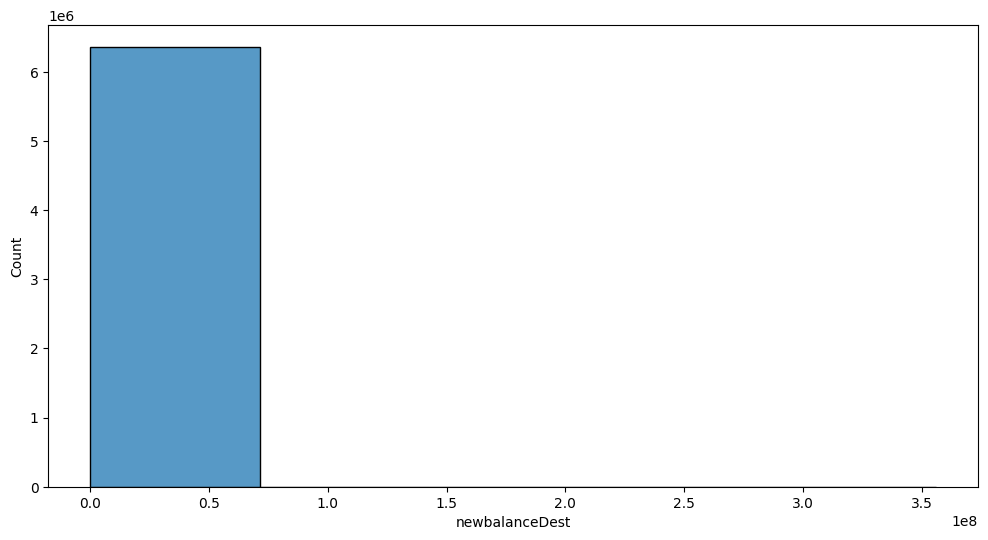

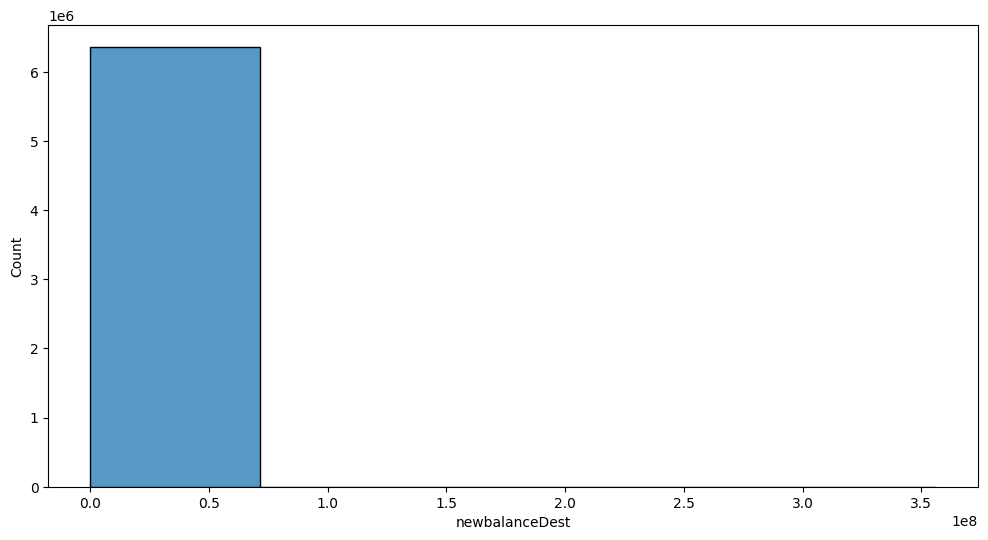

In [33]:
features=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for feature in features:
    plt.xlabel(feature)
    plt.figure(figsize=(12,6))
    sns.histplot(df[feature],bins=5,legend=True)

We have seen some outliers in the dataset lets work on it

In [ ]:
We will use the quantile based flooring and the capping of these columns

Capping : Capping is replacing all higher side values exceeding a certain theoretical maximum or upper control limit (UCL) by the UCL value. 
            Here we'll do 90th percentile for higher values. 

Flooring : Flooring is replacing all values falling below a certain theoretical minimum or lower control limit (UCL) by the LCL value. 
            Here we'll do 10th percentile for lower values.



In [37]:
features=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for feature in features:
    print(feature)
    print(df[feature].quantile(0.10))
    print(df[feature].quantile(0.90))
    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




In [40]:
import numpy as np
for feature in features:
    lower=df[feature].quantile(0.10)
    upper=df[feature].quantile(0.90)
    df[feature]=np.where(df[feature]<lower,lower,df[feature])
    df[feature]=np.where(df[feature]>upper,upper,df[feature])
    print(feature)
    print(df[feature].skew())
    print('\n')




amount
0.8046460444556197


oldbalanceOrg
2.249361299814406


newbalanceOrig
2.2262847493216786


oldbalanceDest
1.4173123924260833


newbalanceDest
1.3593024983493058




Now we will take a look after removing a outliers

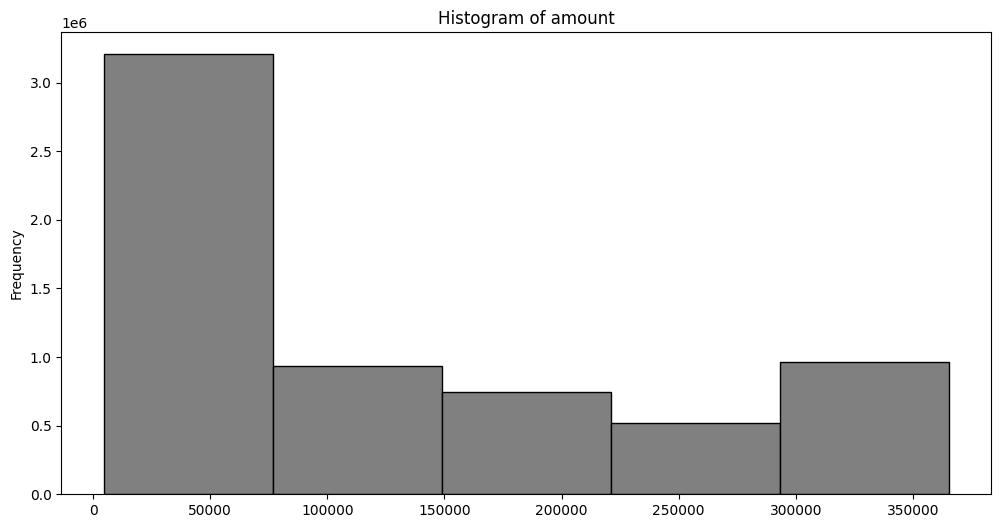

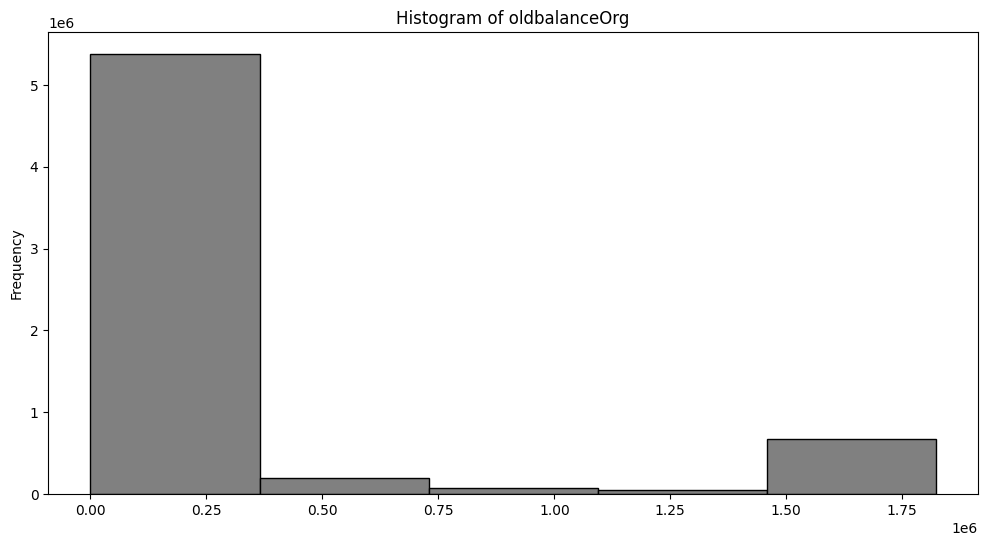

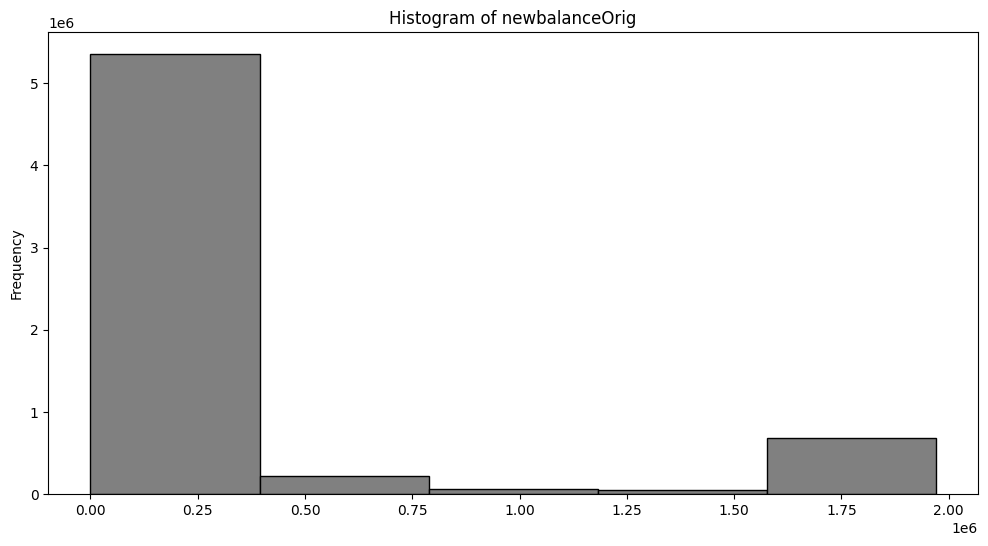

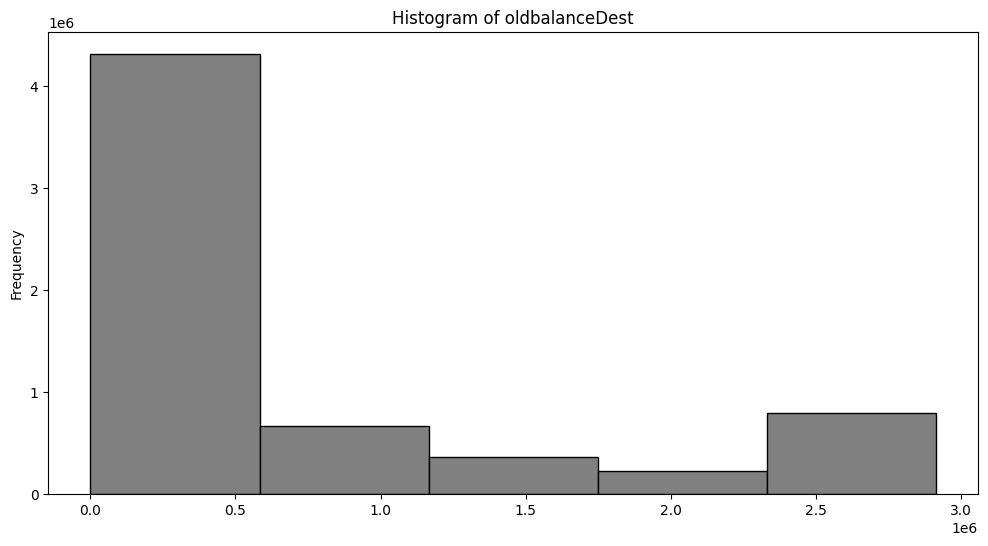

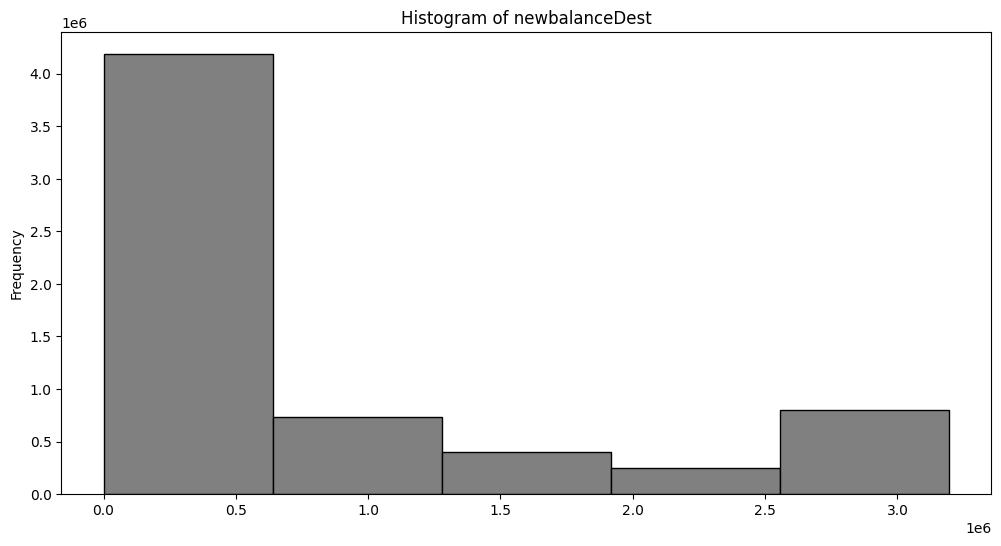

In [44]:
features=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for feature in features:
    plt.figure(figsize=(12, 6))  # Create a new figure for each plot
    plt.xlabel(feature)  # Set the x-axis label
    df[feature].plot(kind='hist', bins=5, facecolor='grey', edgecolor='black')
    plt.title(f'Histogram of {feature}')  # Set the title
    plt.show()


# after outlier treatment

In [ ]:
-> Amount ranges between 0-35 lakhs with more values ranging between 0-75,000. We'll analyze further in the upcoming sections.


-> OldbalanceOrg:

    Range: Typically ranges from 0 to 1.8 million (18 lakh).
    Common Values: Most frequent values are found between 0 and 375,000.
NewbalanceOrig:

    Range: Usually ranges from 0 to 1.9 million (19 lakh).
    Common Values: Highest frequency occurs between 0 and 375,000.
OldbalanceDest:

    Range: Typically ranges from 0 to 2.9 million (29 lakh).
    Common Values: Commonly observed values are between 0 and 625,000.
NewbalanceDest:

    Range: Generally ranges from 0 to 3.5 million (35 lakh).
    Common Values: Frequencies are highest around the range of 0 to 625,000

We will look into the types of transactions are

In [45]:
df.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [47]:
payments=df.type.value_counts()

In [48]:
payments

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

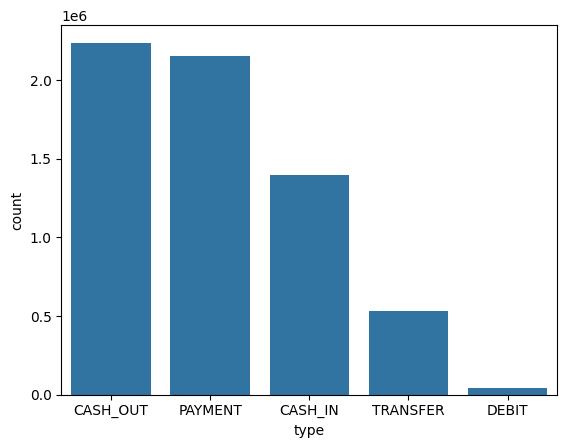

In [49]:
sns.barplot(payments)

<Axes: xlabel='type', ylabel='count'>

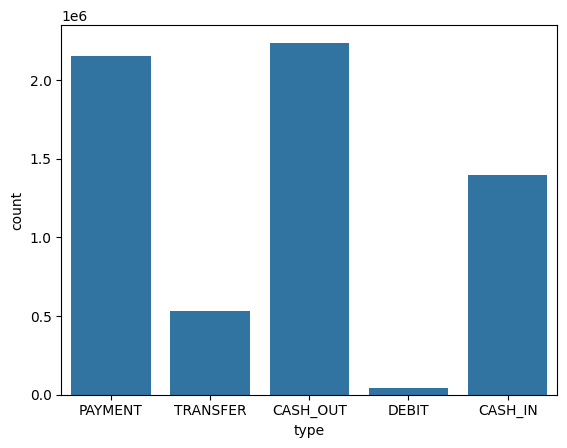

In [50]:
sns.countplot(x='type', data=df)

More money has been transacted mostly through cash out followed by payment type.

Now let's look at the relationship with type column with isfraud column

In [69]:
crossTabResult=pd.crosstab(index=df.type,columns=[df.isFraud])
crossTabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [66]:
#with fraud happened type
crossTabResult[1]

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: 1, dtype: int64

We can see tha mostly fraud occurs during the casgout and the transfer

But the number indicating the fraud is very low and cannot be seen in the graph 

<Axes: xlabel='type'>

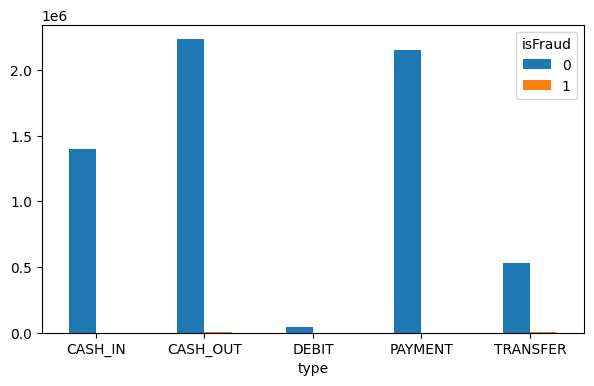

In [68]:
crossTabResult.plot.bar(figsize=(7,4), rot=0)

In [72]:
type(crossTabResult)

pandas.core.frame.DataFrame

<Axes: xlabel='type', ylabel='1'>

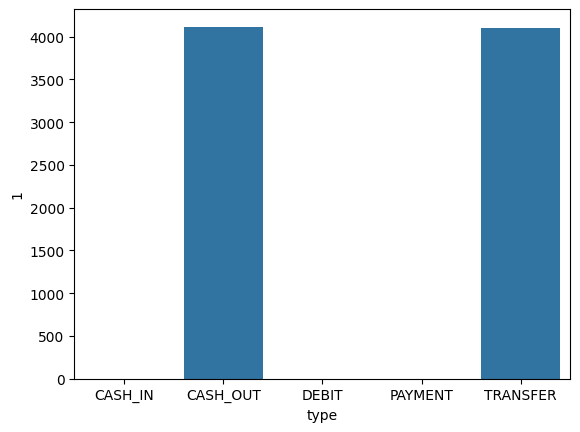

In [73]:
sns.barplot(crossTabResult[1])

(3500.0, 5000.0)

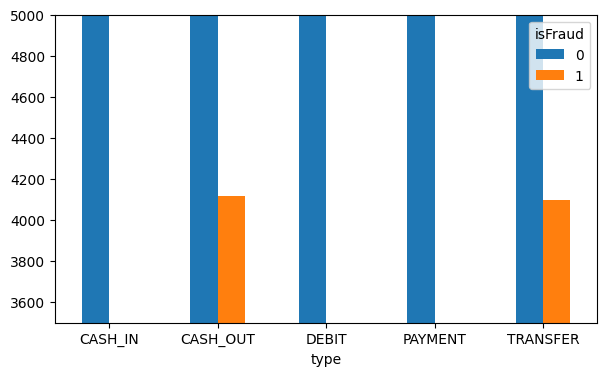

In [79]:
crossTabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim(3500,5000)

# Lets calulate the percantage wise fraud

In [80]:
crossTabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [81]:
cashout=2233384+4116
cashout_fraud=4116/cashout*100
cashout_fraud

0.18395530726256984

0.183% denotes the percantage of fraud happened in a cashout mode type ,which is very less

In [83]:
transfer=528812+4097
transfer_fraud=4097/transfer*100
transfer_fraud

0.7687991758442811

0.768% denotes the percantage of fraud happened in the transfer , which is more than the cashout_fraud 

# Amount

In [84]:
df.amount

0            9839.640
1            4501.300
2            4501.300
3            4501.300
4           11668.140
              ...    
6362615    339682.130
6362616    365423.309
6362617    365423.309
6362618    365423.309
6362619    365423.309
Name: amount, Length: 6362620, dtype: float64

In [89]:
df['amount'].quantile([0,1])

0.0      4501.300
1.0    365423.309
Name: amount, dtype: float64

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

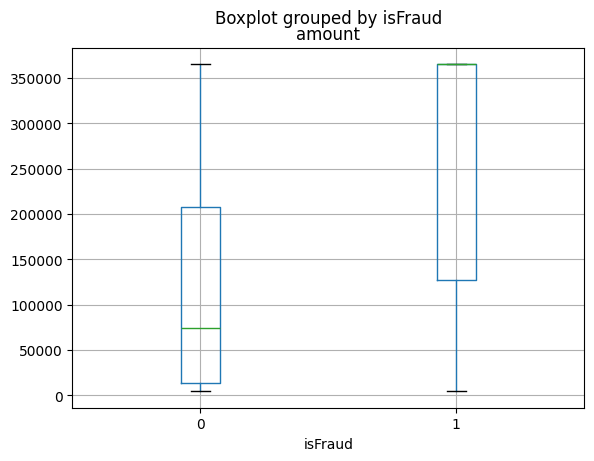

In [90]:
df.boxplot(column='amount', by='isFraud')

# Fraud amount transaction between 1.3lakh-3.65lakh

isFlaggedFraud
isFlaggedFraud denotes the transactions that are assumed to be fraud.

In [91]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

### from 63.6 lakh records only 16 records are flagged as fraud which is actually a very low number

### The actual fraud happend has a very higher value when compared to isFlaggedFraud column.

In [94]:
flagged_fraud_records=df[(df.isFlaggedFraud==1) & (df.isFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,365423.309,C728984460,1822508.289,1970344.793,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,365423.309,C1100582606,1343002.080,1343002.080,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,365423.309,C1035541766,536624.410,536624.410,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,365423.309,C908544136,1822508.289,1970344.793,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,365423.309,C689608084,1822508.289,1970344.793,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,365423.309,C452586515,1822508.289,1970344.793,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,365423.309,C193696150,1822508.289,1970344.793,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.220,C1684585475,353874.220,353874.220,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,365423.309,C786455622,1822508.289,1970344.793,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,365423.309,C19004745,1822508.289,1970344.793,C1806199534,0.0,0.0,1,1


In [95]:
flagged_fraud_records.shape

(16, 11)

In [105]:
flagged_fraud_records=flagged_fraud_records.shape[0]

In [97]:
total_frauds=df[df.isFraud==1]
total_frauds

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,4501.300,C1305486145,181.000,0.0,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,4501.300,C840083671,181.000,0.0,C38997010,21182.000,0.000,1,0
251,1,TRANSFER,4501.300,C1420196421,2806.000,0.0,C972765878,0.000,0.000,1,0
252,1,CASH_OUT,4501.300,C2101527076,2806.000,0.0,C1007251739,26202.000,0.000,1,0
680,1,TRANSFER,20128.000,C137533655,20128.000,0.0,C1848415041,0.000,0.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130,C786484425,339682.130,0.0,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,365423.309,C1529008245,1822508.289,0.0,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.0,C1365125890,68488.840,3194869.671,1,0
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.0,C2080388513,0.000,0.000,1,0


In [102]:
total_frauds=total_frauds.shape[0]

AttributeError: 'int' object has no attribute 'shape'

In [103]:
total_frauds

8213

In [106]:
flaggeg_precantage=flagged_fraud_records/total_frauds * 100

In [107]:
flaggeg_precantage

0.1948131011810544

only 0.195 % of the fraud transactions are flagged as a fraud which is very less

In [108]:
unflagged_fraud_percantage=(total_frauds-flagged_fraud_records)/total_frauds *100

In [112]:
print("percantage of incorrectly flageed : ",round(unflagged_fraud_percantage,3))

percantage of incorrectly flageed :  99.805


##### In this we have to handle the false negative predictions (confusion matrix ) where the model predicts the transaction is not fraud
#### but in actual it is fraud

In [115]:
total_transactions=df.shape[0]
fraud_transactions_percantage=total_frauds/total_transactions*100

In [116]:
fraud_transactions_percantage

0.12908204481801522

In [152]:
print("total transactions : ", total_transactions)
print("total fraud transactions " , total_frauds)
print("fraud percantage : ",round(fraud_transactions_percantage,2))

total transactions :  6362620
total fraud transactions  8213
fraud percantage :  0.13


In [121]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188057,367,CASH_OUT,365423.309,C1210833971,435867.160,0.000,C363013236,186826.40,622693.550,1,0
5990227,416,CASH_OUT,365423.309,C2110305720,1822508.289,0.000,C225008798,523626.59,3194869.671,1,0
5990225,416,CASH_OUT,365423.309,C246726057,1822508.289,0.000,C1786144514,2423749.18,3194869.671,1,0
5990224,416,TRANSFER,365423.309,C298387535,1822508.289,1970344.793,C662194461,0.00,0.000,1,0
5988262,415,CASH_OUT,365423.309,C2137951962,1675153.280,0.000,C309573869,12832.26,1687985.530,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6002113,428,CASH_OUT,4501.300,C1838531308,3037.670,0.000,C505532836,800854.71,803892.380,1,0
6002112,428,TRANSFER,4501.300,C1408814433,3037.670,0.000,C944070846,0.00,0.000,1,0
1796322,162,TRANSFER,4501.300,C1172437299,151.000,0.000,C315826176,0.00,0.000,1,0
1796323,162,CASH_OUT,4501.300,C790340353,151.000,0.000,C517676411,386163.34,386314.340,1,0


<Axes: ylabel='Frequency'>

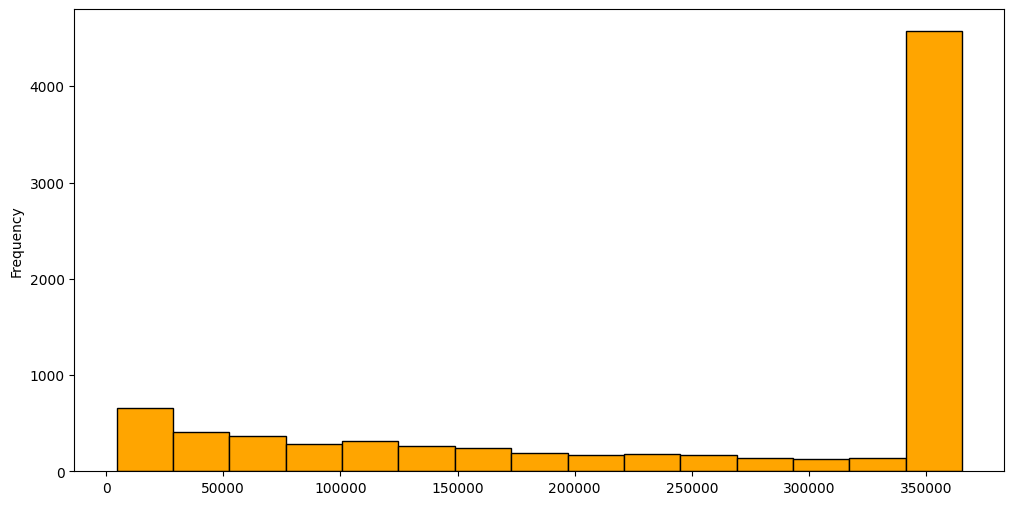

In [122]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

We've found that fraud amount transaction ranges between 1.3-3.6 lakh

Now, we can see that among them most occured were around 340,000-360,000 (3.4-3.6 lakh)


# NameDESt

In [126]:
fraud_names=df.nameDest.value_counts()

In [127]:
fraud_names=fraud_names[:11]

In [128]:
fraud_names

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C977993101      96
Name: count, dtype: int64

<Axes: xlabel='nameDest'>

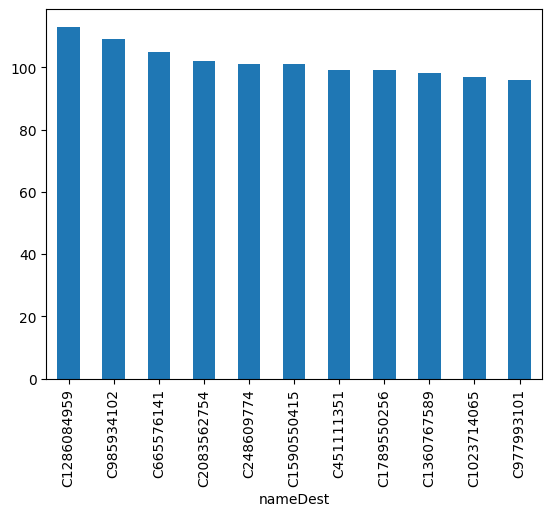

In [129]:
fraud_names.plot(kind='bar')

<Figure size 1200x700 with 0 Axes>

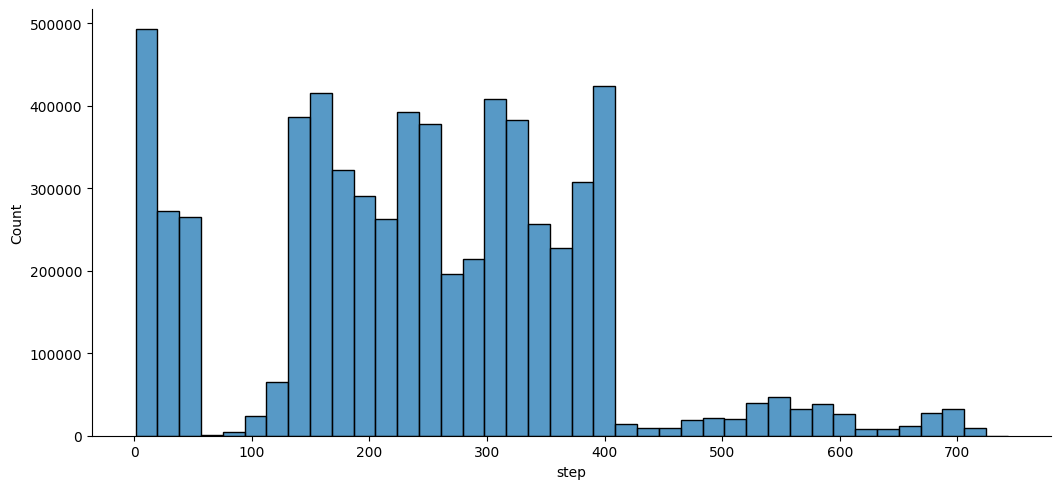

In [138]:
sns.displot(x=df.step,bins=40,aspect=15/7)
plt.show()

In [142]:
corr=df.corr(method='pearson',numeric_only=True)
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.007307,-0.006460,-0.006468,0.002949,-0.004029,0.031578,0.003277
amount,-0.007307,1.000000,0.090592,0.105925,0.405745,0.479862,0.039620,0.003092
oldbalanceOrg,-0.006460,0.090592,1.000000,0.988006,0.191574,0.115405,0.030947,0.003841
newbalanceOrig,-0.006468,0.105925,0.988006,1.000000,0.195563,0.108278,-0.014391,0.003795
oldbalanceDest,0.002949,0.405745,0.191574,0.195563,1.000000,0.970051,-0.012913,-0.001079
newbalanceDest,-0.004029,0.479862,0.115405,0.108278,0.970051,1.000000,-0.000797,-0.001130
isFraud,0.031578,0.039620,0.030947,-0.014391,-0.012913,-0.000797,1.000000,0.044109
isFlaggedFraud,0.003277,0.003092,0.003841,0.003795,-0.001079,-0.001130,0.044109,1.000000


<Axes: >

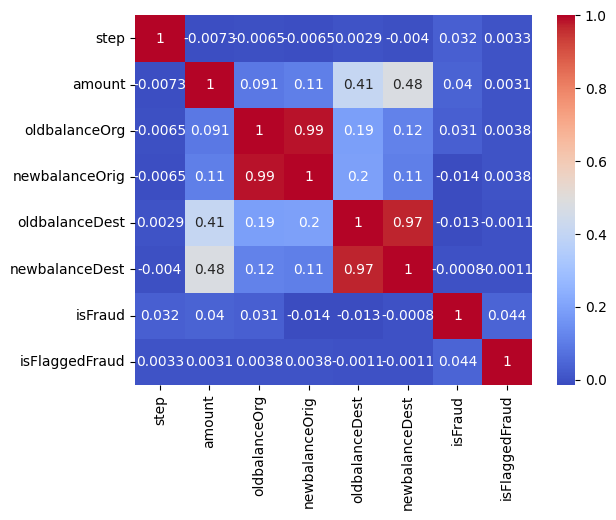

In [151]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

here is a high correlation between newbalanceOrig and oldbalanceOrg.

Also, between newbalanceDest and oldbalanceDest.

Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

In [ ]:
1. What is the fraud percent that has happened in the overall transaction ?¶
-> totally there is a 8213 fraud transactions which  are 0.13 % of all transactions

In [ ]:
2. Under which type of transfer payment type fraud has occurred mostly.¶
-> Fraud has happened only in cashout and transfer type. 0.183 % fraud happened in total cashout 
 mode type and 0.769 % fraud happened in total transfer mode type

In [ ]:
3. Were we able to mark the fraud transaction as isFlaggedFraud?¶
No, Only 16 records out of 63 lakh records were flagged as fraud which are very less And that
constitutes to 0.195 % of the total fraud transactions.

In [ ]:
4. What is the percentage of incorrect flagged fraud records?¶
-> We have 8197 fraud-transcations records that are flagged incorrectly which constitues that 99.805% of the total fraud records

In [ ]:
5. Were all the isFlaggedFraud records that are marked as fraud is correct?¶
-> Yes. All the 16 transactions that are flagged as fraud is actually fraud transactions

In [ ]:
6. At what amount range, fraud has happened?¶
The fraud amount transaction ranges between 1.3-3.6 lakh with most occurred in the range 340,000-360,000 (3.4-3.6 lakh).

# **Conclusions**

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [153]:
crossTabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [156]:
df[(df['isFraud']==1) & (df['isFlaggedFraud']==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,4501.300,C1305486145,181.000,0.0,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,4501.300,C840083671,181.000,0.0,C38997010,21182.000,0.000,1,0
251,1,TRANSFER,4501.300,C1420196421,2806.000,0.0,C972765878,0.000,0.000,1,0
252,1,CASH_OUT,4501.300,C2101527076,2806.000,0.0,C1007251739,26202.000,0.000,1,0
680,1,TRANSFER,20128.000,C137533655,20128.000,0.0,C1848415041,0.000,0.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130,C786484425,339682.130,0.0,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,365423.309,C1529008245,1822508.289,0.0,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.0,C1365125890,68488.840,3194869.671,1,0
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.0,C2080388513,0.000,0.000,1,0
